In [71]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [72]:
# Read the train and test data file 
# test = pd.read_csv('../test/test.csv')
train = pd.read_csv('../train/train.csv')
print("Total number of samples in train file : ", train.shape[0])
# print("Total number of samples in test file : ", test.shape[0])

Total number of samples in train file :  1458644
Total number of samples in test file :  625134


In [73]:
# Let's look at the train data first
print("A view of the train dataframe")
print(train.head())
print("\nColumns in train dataset : ", train.columns)

A view of the train dataframe
          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N    

In [74]:
print("Overall description of the train dataset : ")
print(train.info())

Overall description of the train dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
None


In [75]:
# Let's have a look at the traget variable(trip duration) first
target = train['trip_duration']
print("Longest trip duration {} or {} minutes: " .format(np.max(target.values), np.max(target.values)//60))
print("Smallest trip duration {} or {} minutes: ".format(np.min(target.values),np.min(target.values)//60))
print("Average trip duration : {} or {} minutes".format(np.mean(target.values), np.mean(target.values)//60))

Longest trip duration 3526282 or 58771 minutes: 
Smallest trip duration 1 or 0 minutes: 
Average trip duration : 959.4922729603659 or 15.0 minutes


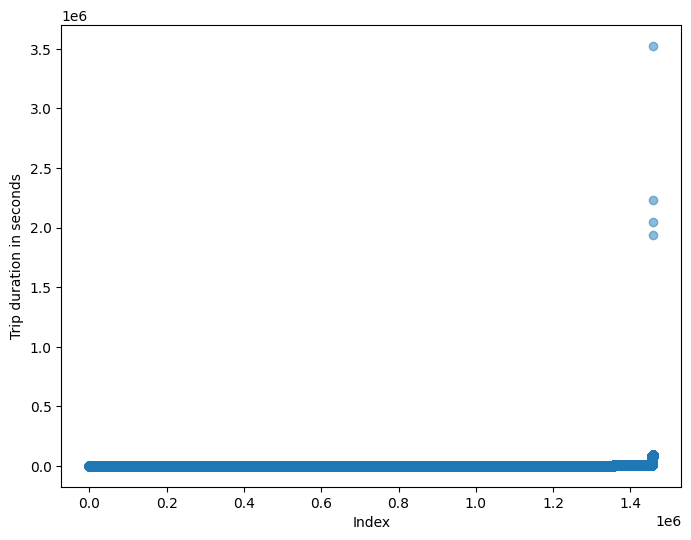

In [76]:
#Visualization
f = plt.figure(figsize=(8,6))
plt.scatter(range(len(target)), np.sort(target.values), alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Trip duration in seconds')
plt.show()

In [77]:
# Remove outliers (values that are more than 3 standard deviations away from the mean)
mean = train['trip_duration'].mean()
std = train['trip_duration'].std()
train = train[train['trip_duration'] < mean + 3*std]#2.5

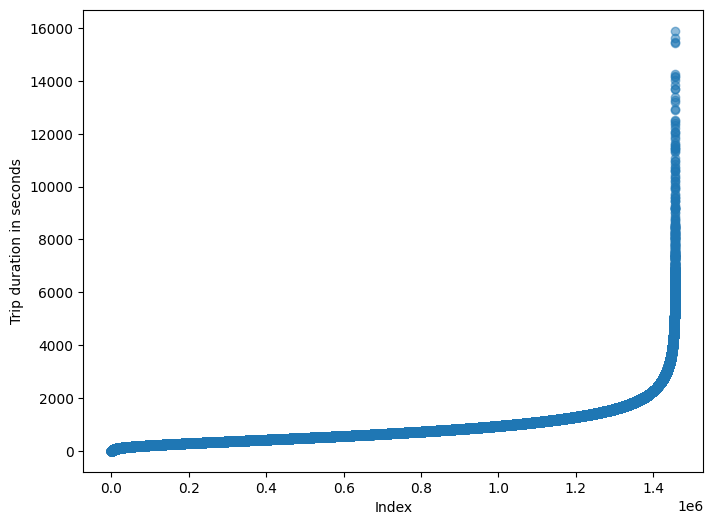

In [78]:
# Update the target variable after removing the outliers
target = train['trip_duration']

f = plt.figure(figsize=(8,6))
plt.scatter(range(len(target)), np.sort(target.values), alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Trip duration in seconds')
plt.show()

Number of unique vendors :  2
How popular is the vendor? 


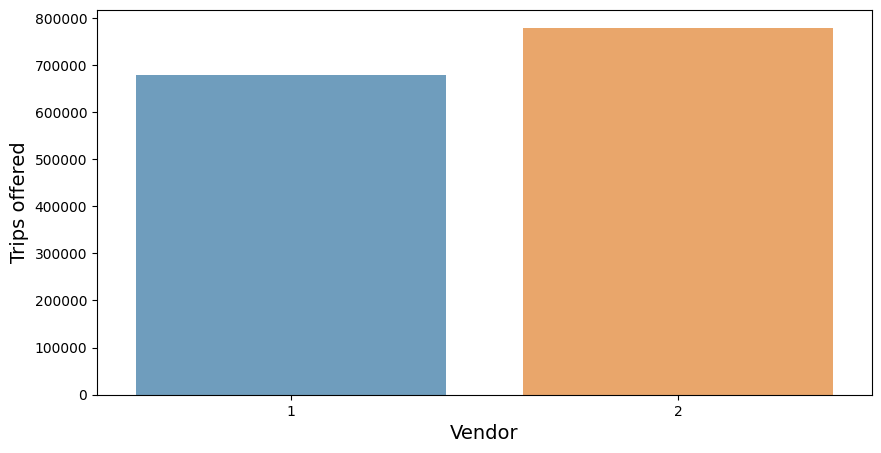

In [79]:
# Moving on to the vendor_id column
unique_vendors = set(train['vendor_id'].values)
print("Number of unique vendors : ", len(unique_vendors))
print("How popular is the vendor? ")
vendor_popularity = train['vendor_id'].value_counts()

f = plt.figure(figsize=(10,5))
sns.barplot(x=vendor_popularity.reset_index()['index'], y=vendor_popularity.values, alpha=0.7)
plt.xlabel('Vendor', fontsize=14)
plt.ylabel('Trips offered', fontsize=14)
plt.show()

Maximum number of passengers on a trip :  9
Minimum number of passengers on a trip :  0
Average number of passengers on a trip :  1.6639442910781554


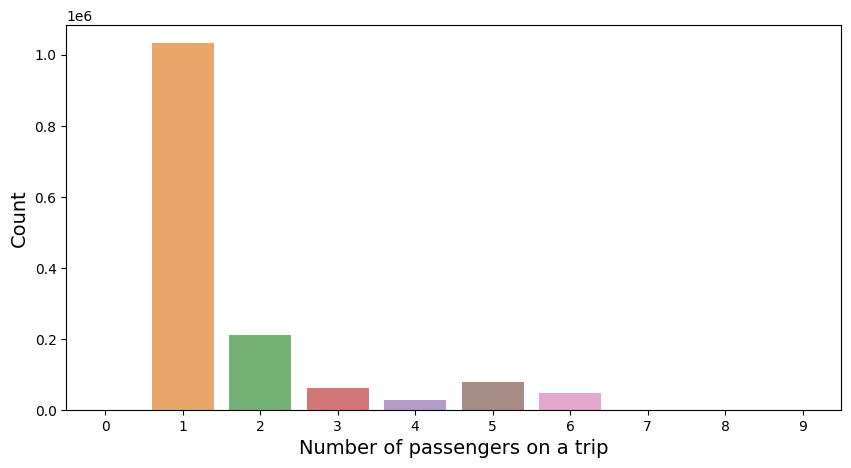

In [80]:
# Moving to passengers count column
pass_count = train['passenger_count']
print("Maximum number of passengers on a trip : ", np.max(pass_count.values))
print("Minimum number of passengers on a trip : ", np.min(pass_count.values))
print("Average number of passengers on a trip : ", np.mean(pass_count.values))

f = plt.figure(figsize=(10,5))
pass_count = train['passenger_count'].value_counts()
sns.barplot(x=pass_count.index.values, y=pass_count.values, alpha=0.7)
plt.xlabel('Number of passengers on a trip', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [81]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
# test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

train['pickup_day'] = train['pickup_datetime'].dt.day
train['pickup_month'] = train['pickup_datetime'].dt.month
train['pickup_weekday'] = train['pickup_datetime'].dt.weekday
train['pickup_hour'] = train['pickup_datetime'].dt.hour

# test['pickup_day'] = test['pickup_datetime'].dt.day
# test['pickup_month'] = test['pickup_datetime'].dt.month
# test['pickup_weekday'] = test['pickup_datetime'].dt.weekday
# test['pickup_hour'] = test['pickup_datetime'].dt.hour

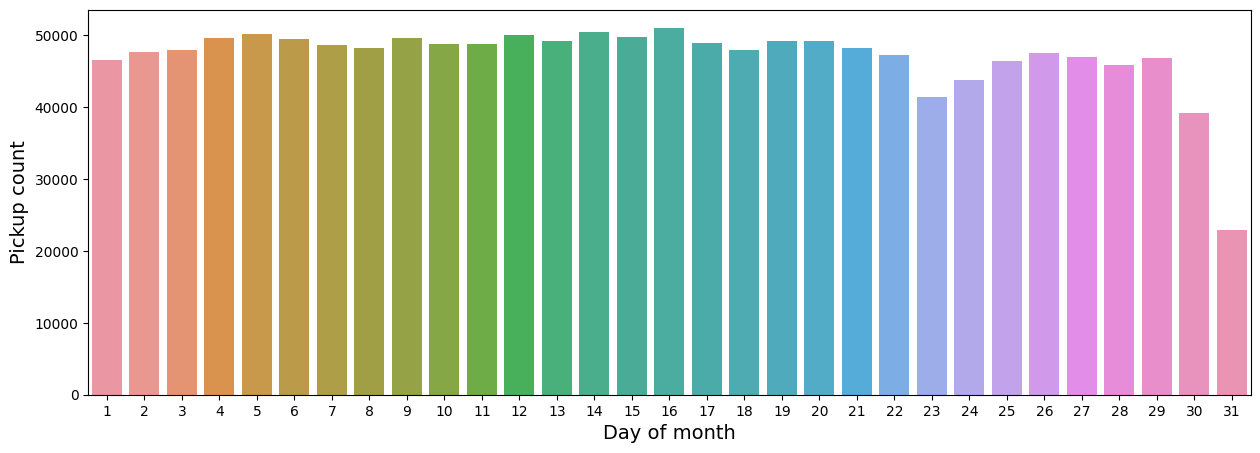

In [82]:
# Do the number of pickups looks same for the whole month? Let's find out
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_day', data=train)
plt.xlabel('Day of month', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

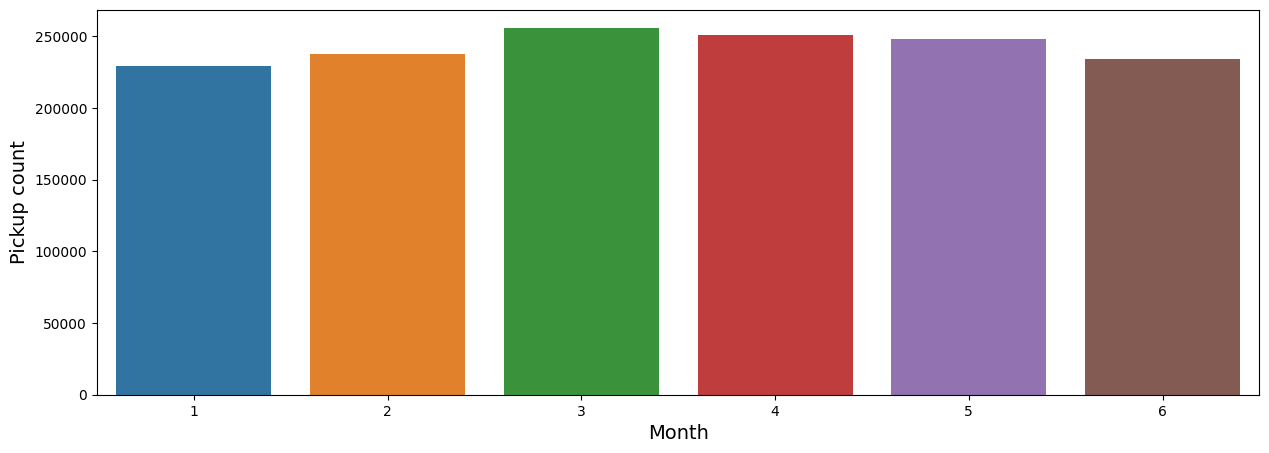

In [83]:
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_month', data=train)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

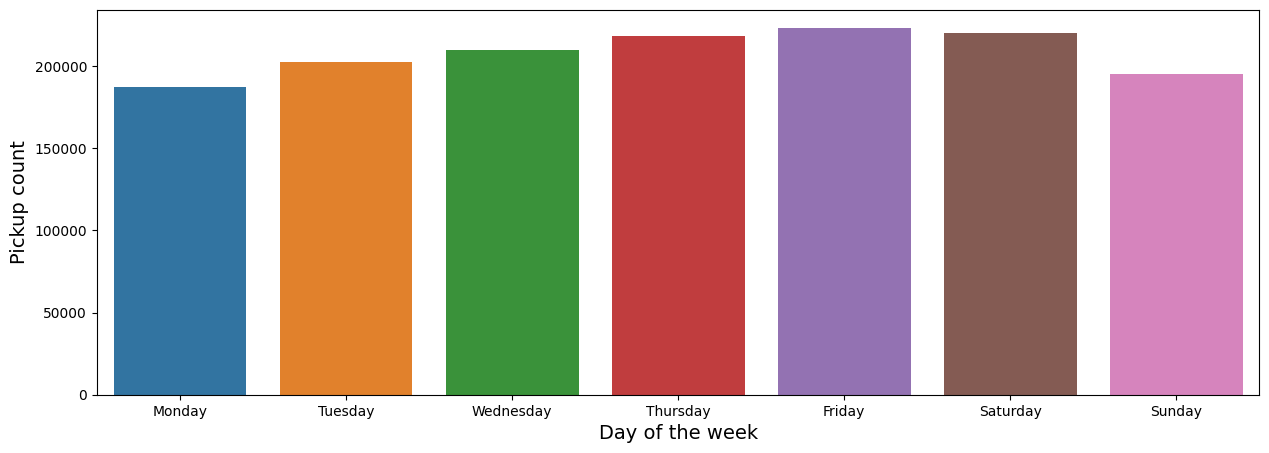

In [84]:
f = plt.figure(figsize=(15,5))
days = [i for i in range(7)]
sns.countplot(x='pickup_weekday', data=train)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.show()

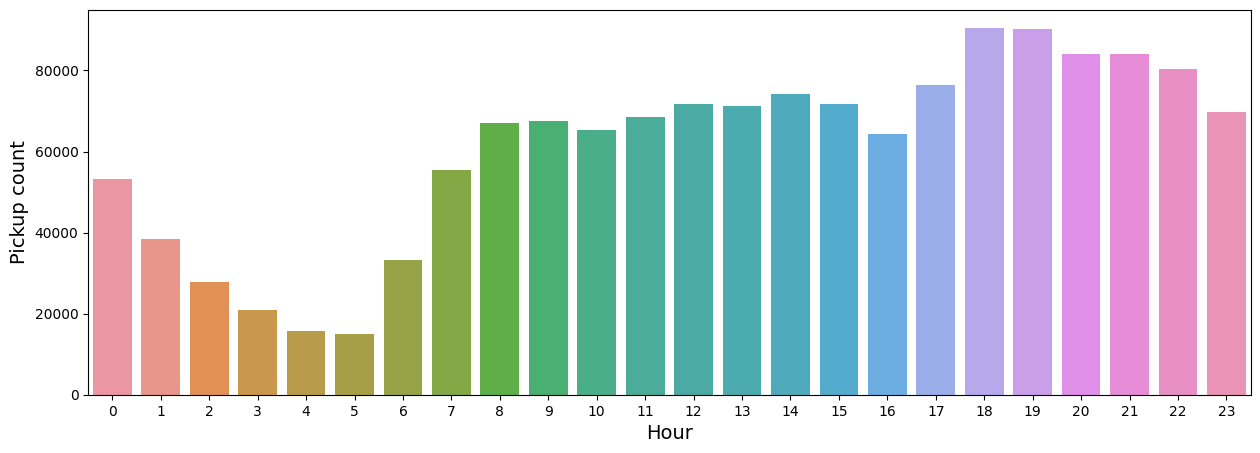

In [85]:
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_hour', data=train)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

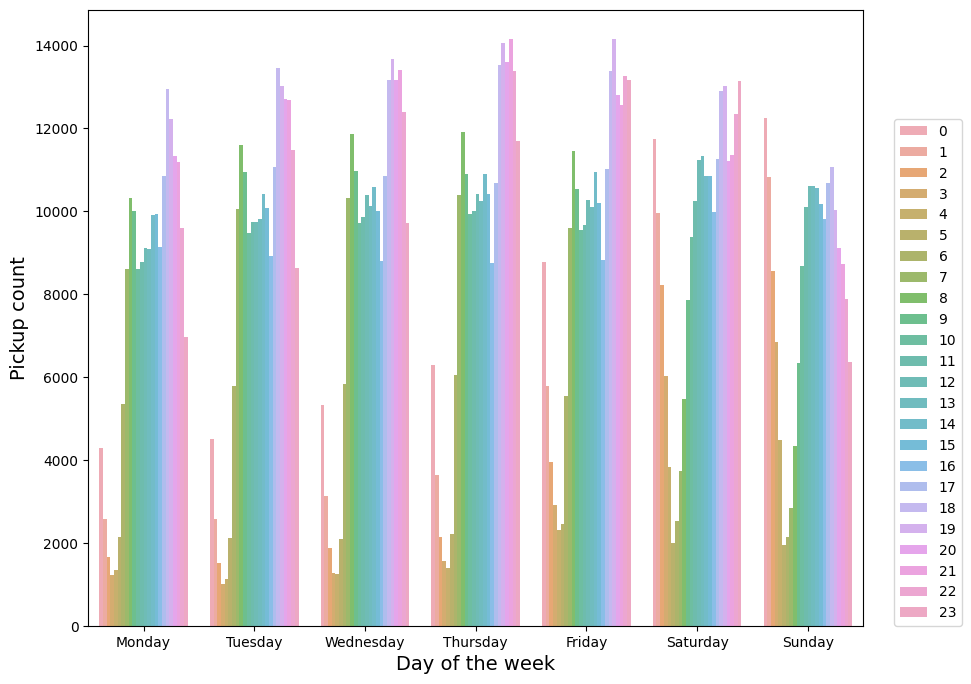

In [86]:
f = plt.figure(figsize=(10,8))
days = [i for i in range(7)]
sns.countplot(x='pickup_weekday', data=train, hue='pickup_hour', alpha=0.8)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.legend(loc=(1.04,0))
plt.show()

In [87]:
train['store_and_fwd_flag'] = train['store_and_fwd_flag'].map({'Y': 1, 'N': 0}).astype(int)

# test['store_and_fwd_flag'] = test['store_and_fwd_flag'].map({'Y': 1, 'N': 0}).astype(int)

In [88]:
from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(row):
    lon1 = row['pickup_longitude']
    lat1 = row['pickup_latitude']
    lon2 = row['dropoff_longitude']
    lat2 = row['dropoff_latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c
    return km

train['distance'] = train.apply(lambda row: haversine(row), axis=1)
train

# test['distance'] = test.apply(lambda row: haversine(row), axis=1)
# test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_weekday,pickup_hour,distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,30,6,3,23,2.744701
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,30,6,3,23,2.757507
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,30,6,3,23,1.305335
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,30,6,3,23,5.265780
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,30,6,3,23,0.960239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,0,1,1,4,0,0.966830
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,0,1,1,4,0,6.192453
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,0,1,1,4,0,8.148600
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,0,1,1,4,0,20.367952


In [89]:
train= train.drop(['id','pickup_datetime','dropoff_datetime','vendor_id'],axis=1)

# test= test.drop(['id','pickup_datetime','vendor_id'],axis=1)

In [90]:
numerical = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_day' ,'pickup_month',	'pickup_weekday',	'pickup_hour','store_and_fwd_flag', 'trip_duration']
numerical_sub_trip_duration = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_day' ,'pickup_month',	'pickup_weekday',	'pickup_hour','store_and_fwd_flag']

In [91]:
train[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,1456571.0,1.663944,1.313618,0.000000,1.000000,1.000000,2.000000,9.000000
pickup_longitude,1456571.0,-73.973489,0.070913,-121.933342,-73.991867,-73.981743,-73.967331,-61.335529
pickup_latitude,1456571.0,40.750927,0.032866,34.359695,40.737354,40.754105,40.768360,51.881084
dropoff_longitude,1456571.0,-73.973419,0.070675,-121.933304,-73.991325,-73.979752,-73.963020,-61.335529
dropoff_latitude,1456571.0,40.751801,0.035888,32.181141,40.735889,40.754528,40.769810,43.921028
pickup_day,1456571.0,15.503983,8.702953,1.000000,8.000000,15.000000,23.000000,31.000000
pickup_month,1456571.0,3.516766,1.681032,1.000000,2.000000,4.000000,5.000000,6.000000
pickup_weekday,1456571.0,3.049968,1.954026,0.000000,1.000000,3.000000,5.000000,6.000000
pickup_hour,1456571.0,13.606575,6.399354,0.000000,9.000000,14.000000,19.000000,23.000000
store_and_fwd_flag,1456571.0,0.005523,0.074113,0.000000,0.000000,0.000000,0.000000,1.000000


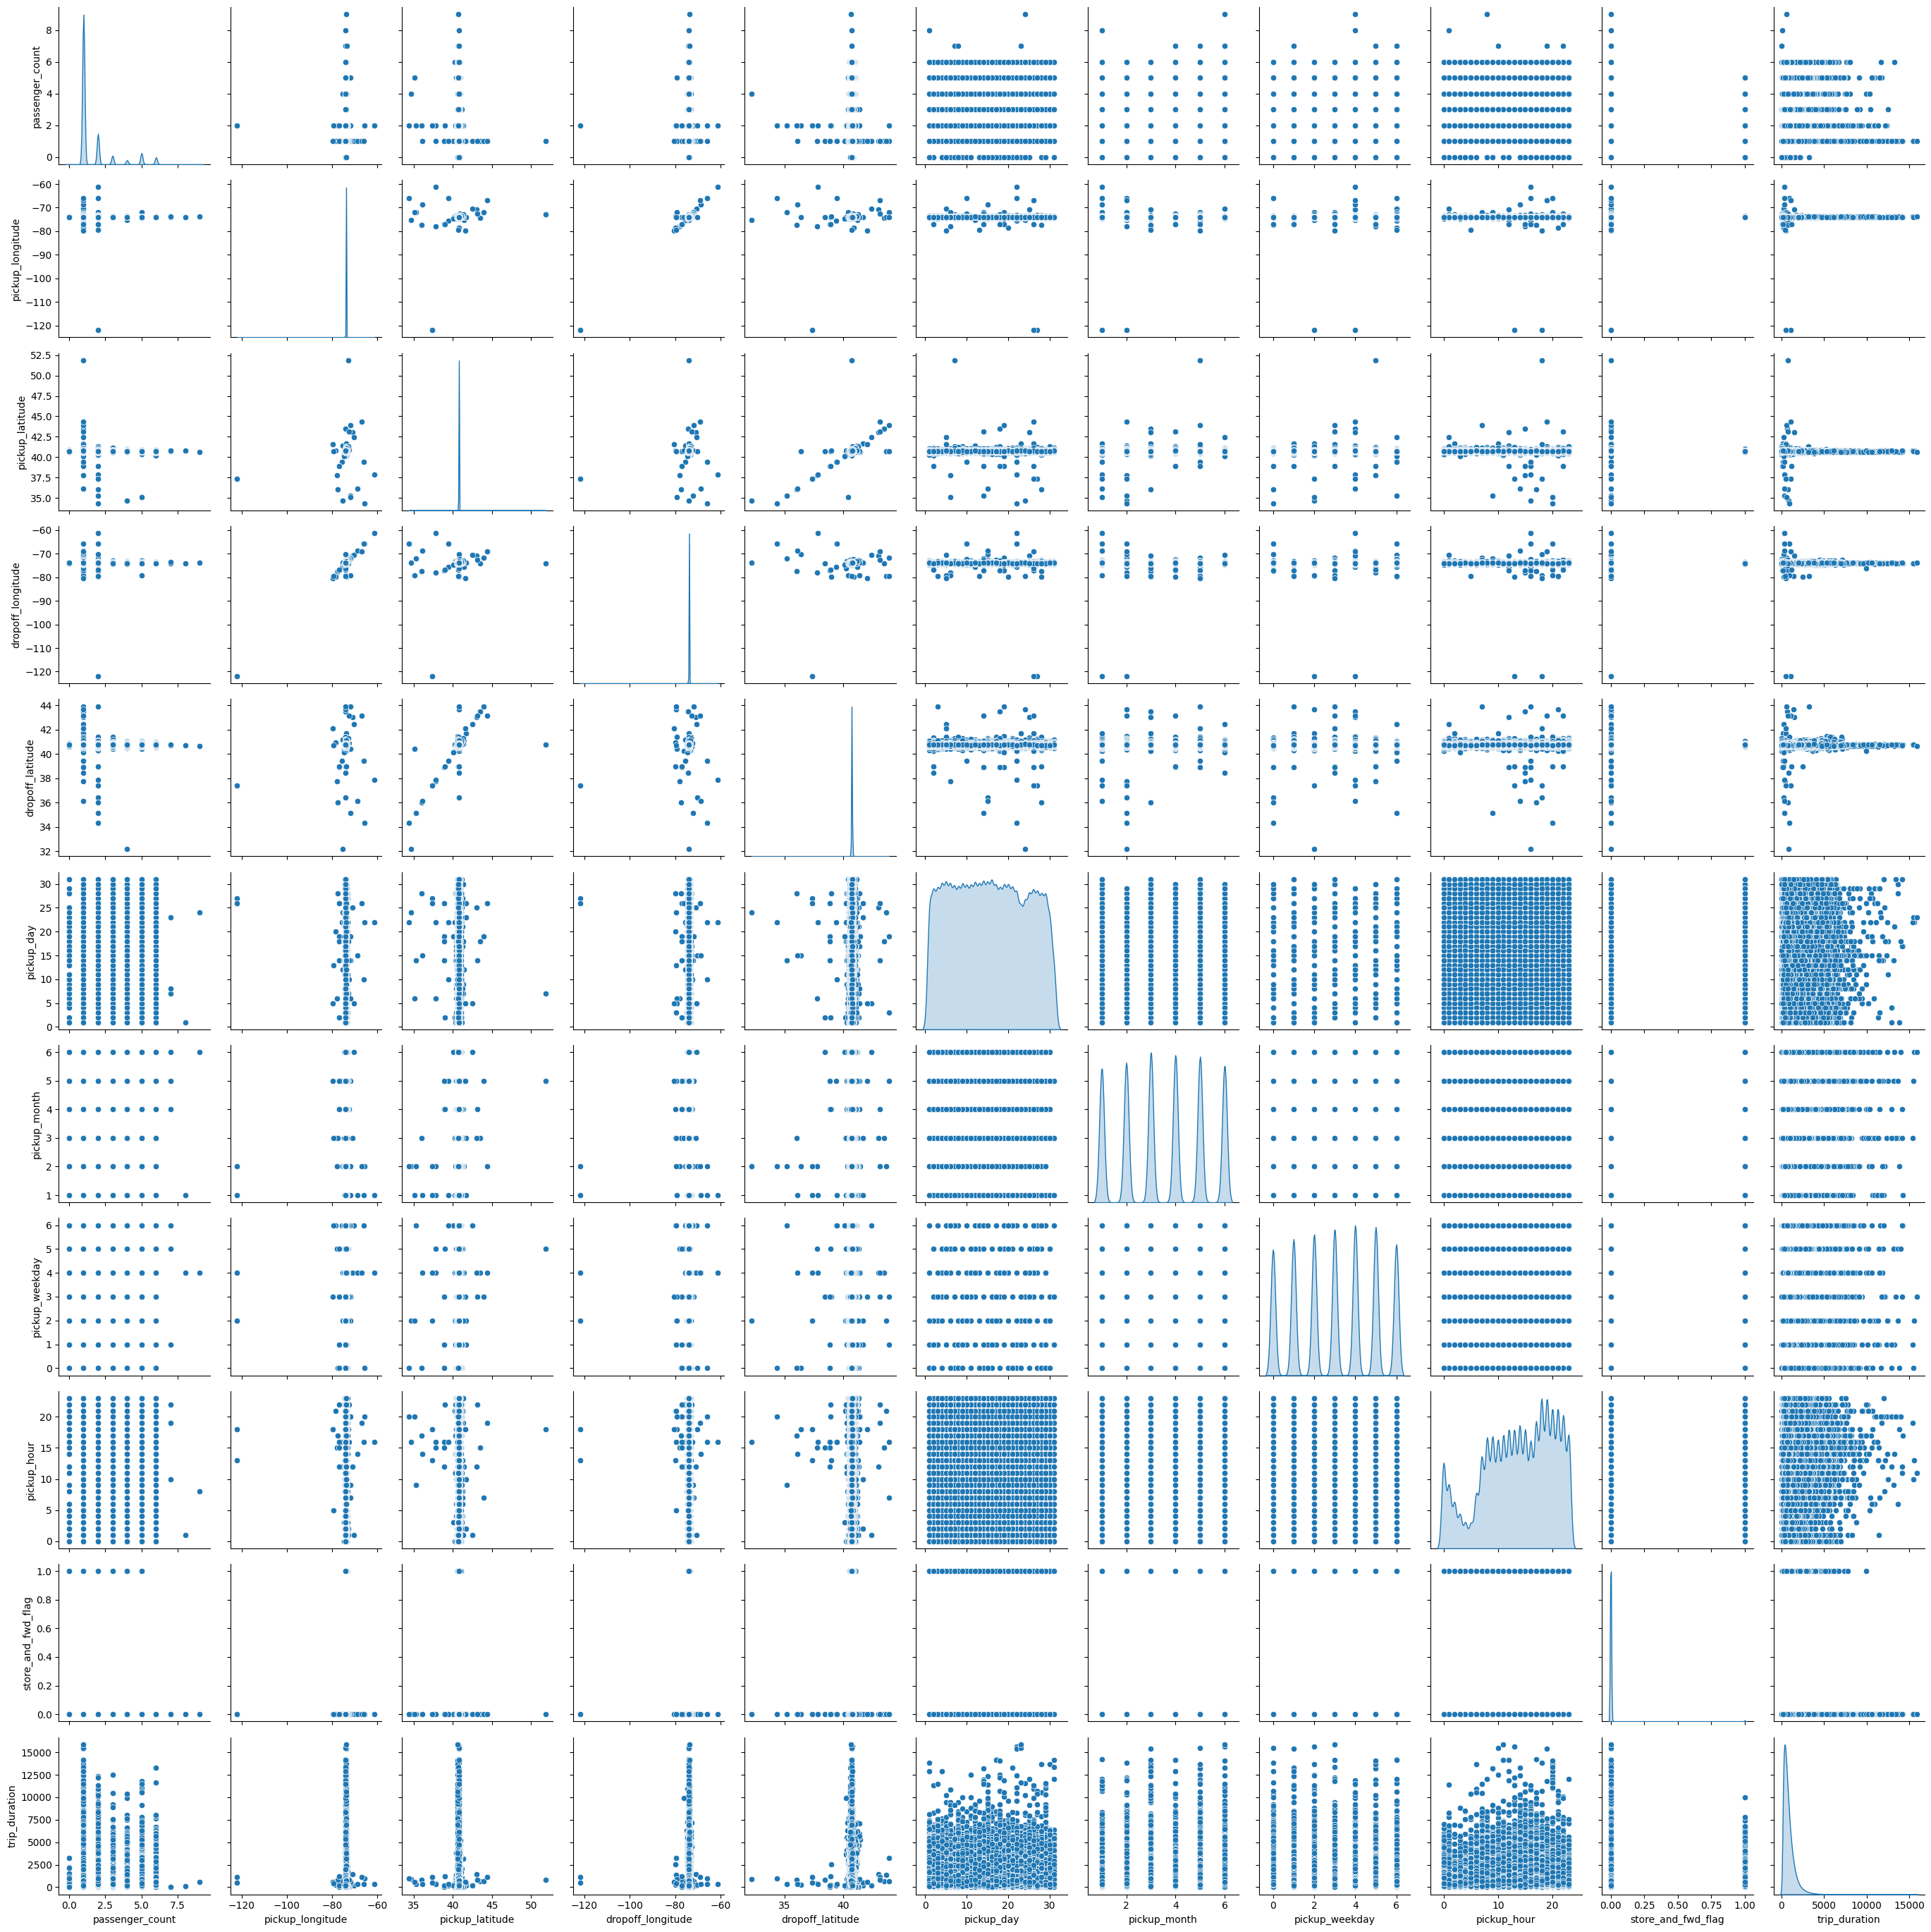

In [108]:
sns.pairplot(train[numerical], diag_kind='kde')
plt.tight_layout()
plt.show()

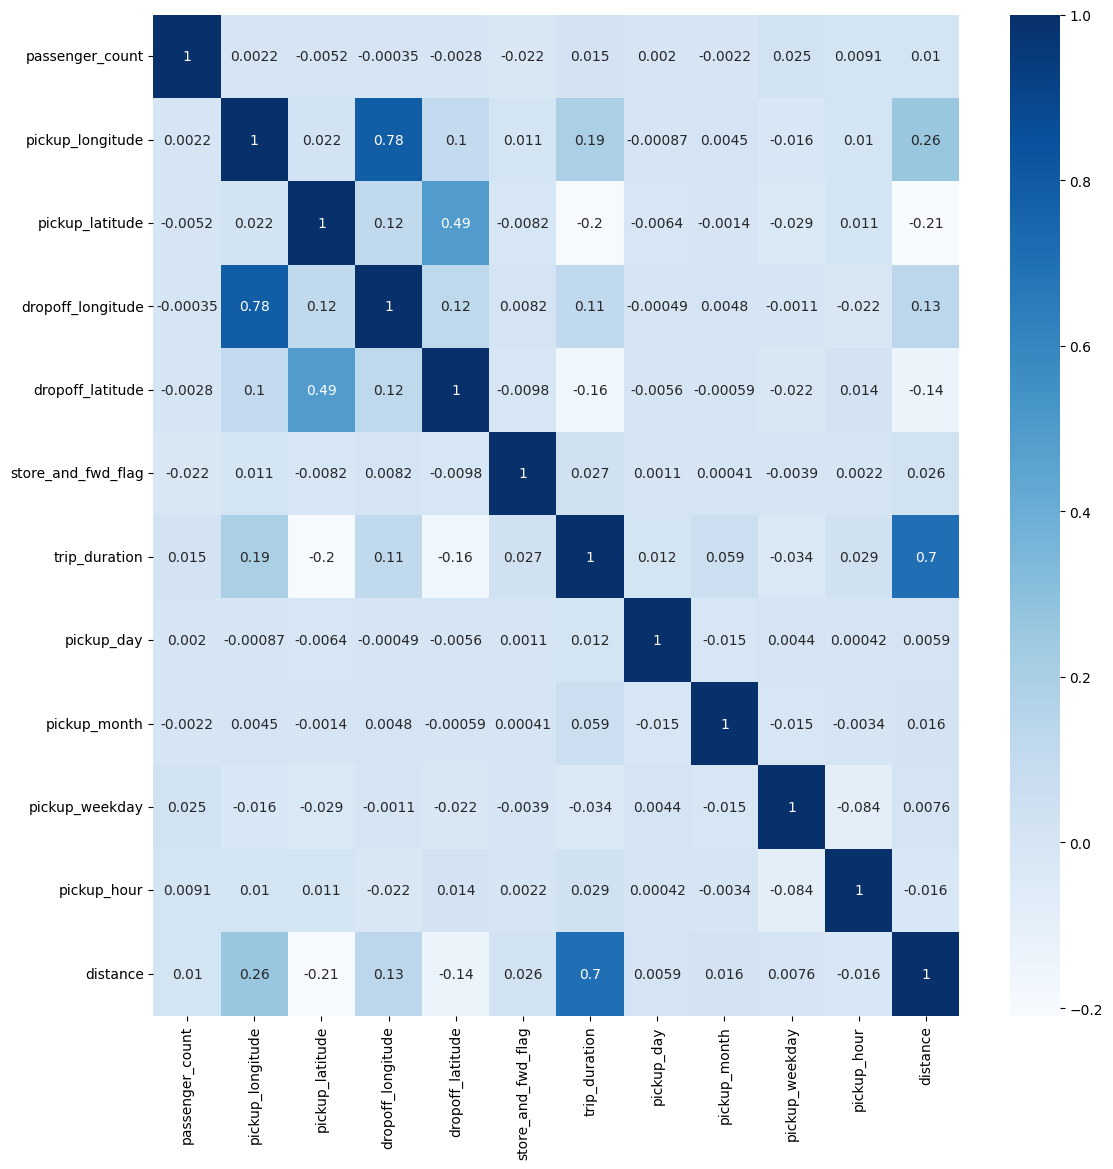

In [93]:
cm = train.corr()
fig = sns.heatmap(cm, annot=True, cmap='Blues')
fig.figure.set_size_inches(13, 13)

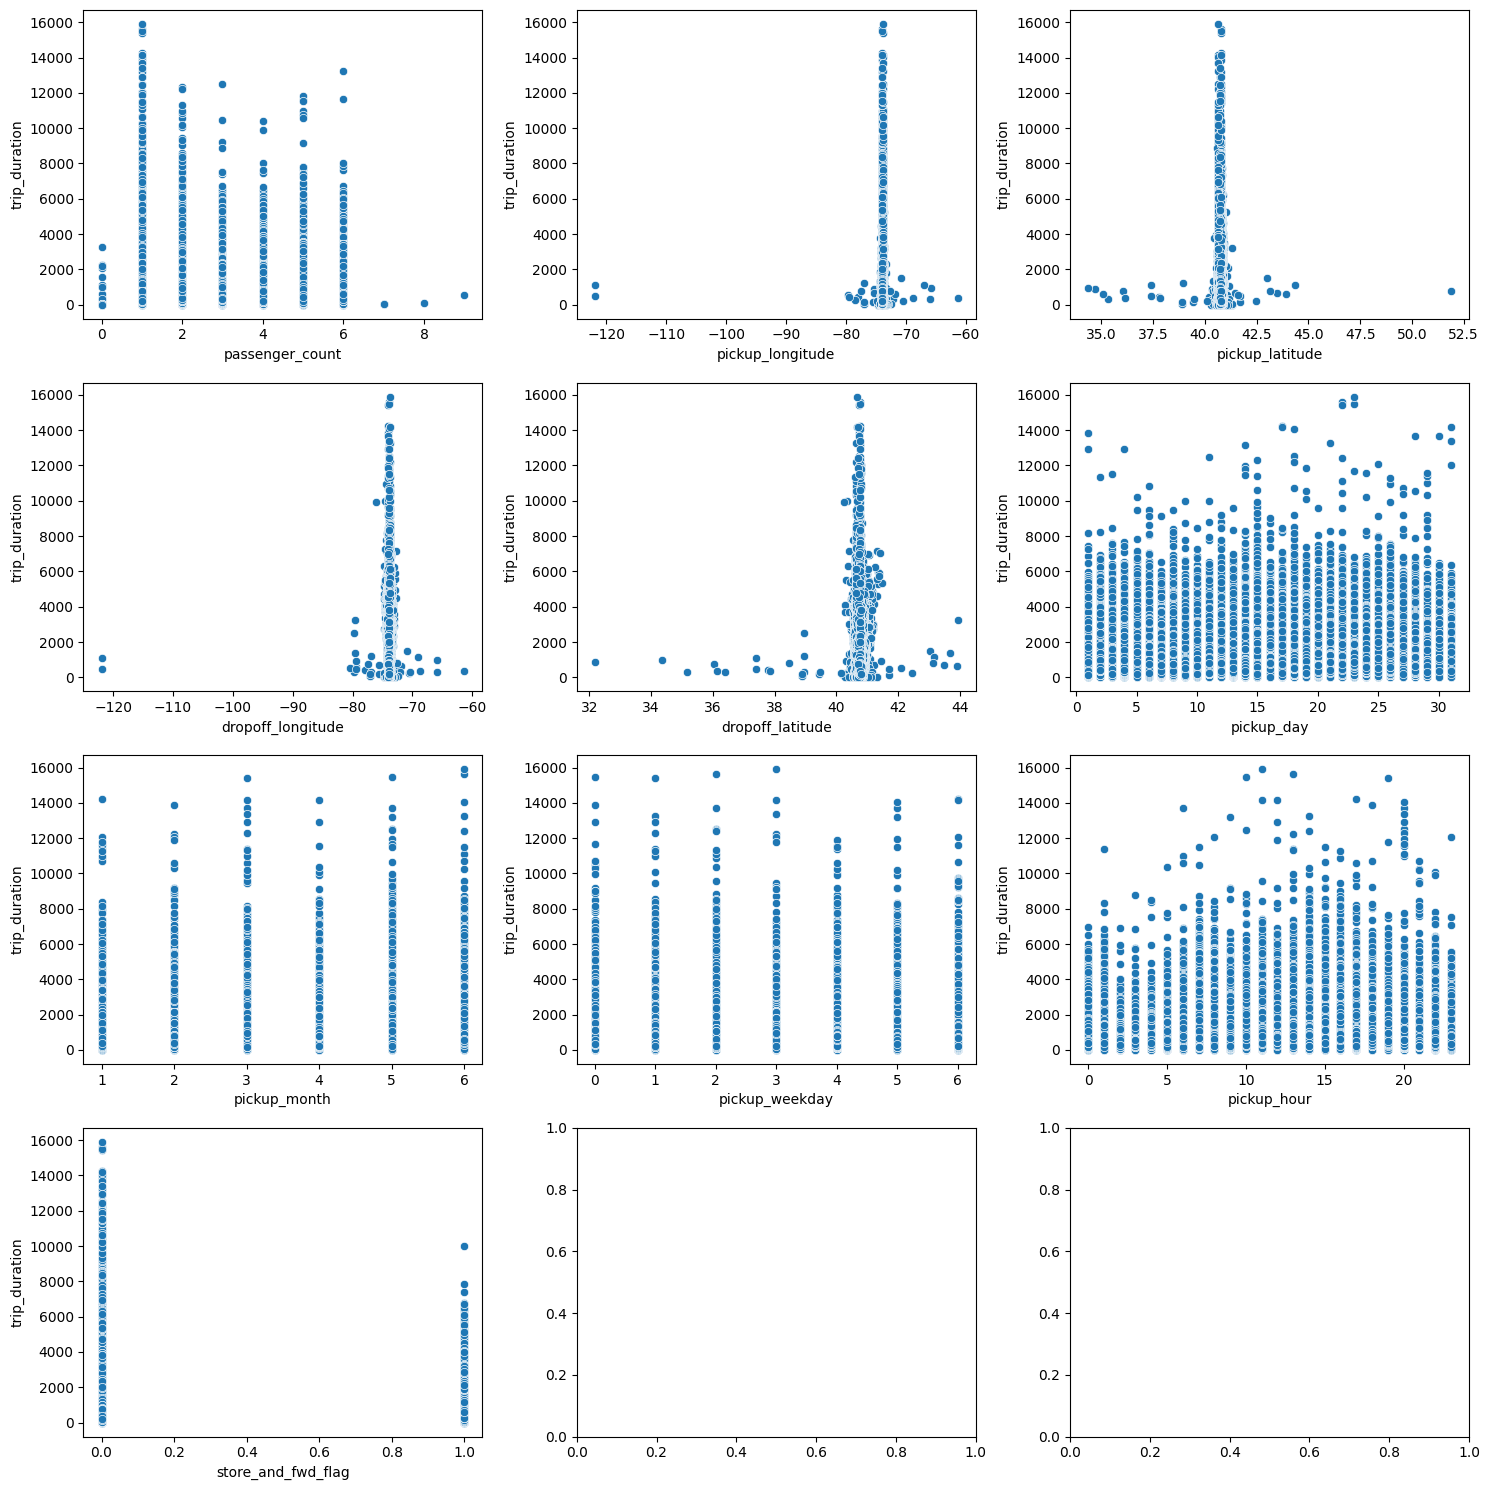

In [107]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
for i, col in enumerate(numerical_sub_trip_duration):
    sns.scatterplot(x=col, y='trip_duration', data=train, ax=axes[i//3, i%3])
plt.tight_layout()

In [95]:
# split the data into train and test

# X_train = train.drop('trip_duration', axis=1)
# y_train = train['trip_duration']
# samp = pd.read_csv('../sample_submission/sample_submission.csv')
# X_test, y_test = test, samp['trip_duration']

X= train.drop('trip_duration', axis=1)
y = train['trip_duration']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [96]:
class CustomLinearRegression(BaseEstimator):
    def __init__(self, learning_rate=0.01, n_iterations=1000, epsilon=1e-5):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.epsilon = epsilon
        self.weights = None
        self.bias = None
        self.loss_history = []
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        delta = np.ones_like(self.weights)
        iteration = 0
        
        while np.linalg.norm(delta) > self.epsilon and iteration < self.n_iterations:
            y_predicted = np.dot(X, self.weights) + self.bias
            
            loss = 1/(2*n_samples) * np.sum(np.square(y_predicted - y))
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            delta = self.learning_rate * dw
            self.weights -= delta
            self.bias -= self.learning_rate * db
            self.loss_history.append(loss)
            
            iteration += 1
    
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [97]:
def evaluate(y_true, y_pred, verbose=False):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    if verbose:
        print(f'MSE: {mse:.3f}')
        print(f'RMSE: {rmse:.3f}')
        print(f'MAE: {mae:.3f}')
        print(f'R2: {r2:.3f}')
    
    return mse, rmse, mae, r2

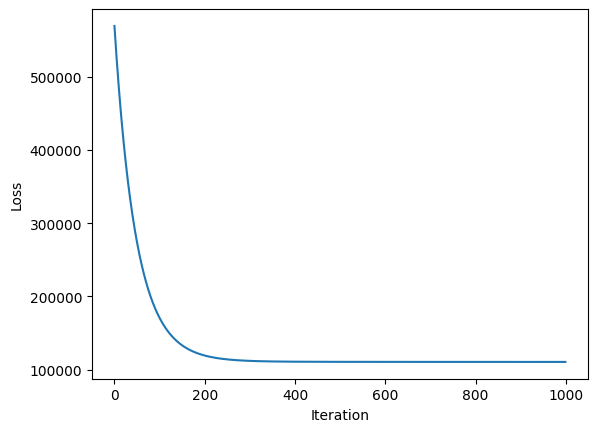

In [98]:

custom_lr = CustomLinearRegression()
custom_lr.fit(X_train_scaled, y_train)

plt.plot(custom_lr.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [99]:

y_train_pred_custom = custom_lr.predict(X_train_scaled)
y_test_pred_custom = custom_lr.predict(X_val_scaled)

results = pd.DataFrame(
    [evaluate(y_train, y_train_pred_custom), evaluate(y_val, y_test_pred_custom)], 
    index=pd.MultiIndex.from_tuples([('Custom lr', 'Train'), ('Custom lr', 'Validation')], 
    names=['Model', 'Set']), 
    columns=['MSE', 'RMSE', 'MAE', 'R2']
)
results

MSE        RMSE         MAE        R2
Model     Set                                                        
Custom lr Train       220828.714802  469.924159  299.068476  0.495878
          Validation  196728.185703  443.540512  298.474400  0.547577

In [100]:
from sklearn.linear_model import LinearRegression

models = {
    'Linear regression': LinearRegression()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_val_scaled)
    results.loc[(name, 'Train'), :] = evaluate(y_train, y_train_pred)
    results.loc[(name, 'Validation'), :] = evaluate(y_val, y_test_pred)

results

MSE        RMSE         MAE        R2
Model             Set                                                        
Custom lr         Train       220828.714802  469.924159  299.068476  0.495878
                  Validation  196728.185703  443.540512  298.474400  0.547577
Linear regression Train       220798.576630  469.892090  299.025154  0.495947
                  Validation  196665.805744  443.470186  298.435272  0.547720

In [102]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_iterations': [1000, 2500, 3000],
}

grid_search = GridSearchCV(CustomLinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {np.sqrt(-grid_search.best_score_):.3f}')

Best parameters: {'learning_rate': 0.01, 'n_iterations': 1000}
Best score: 482.466


In [104]:

best_custom_lr = CustomLinearRegression(**grid_search.best_params_)
best_custom_lr.fit(X_train_scaled, y_train)

y_train_pred_custom = best_custom_lr.predict(X_train_scaled)
y_test_pred_custom = best_custom_lr.predict(X_val_scaled)

results.loc[('Best_Custom lr', 'Train'), :] = evaluate(y_train, y_train_pred_custom)
results.loc[('Best_Custom lr', 'Validation'), :] = evaluate(y_val, y_test_pred_custom)

results

MSE        RMSE         MAE        R2
Model             Set                                                        
Custom lr         Train       220828.714802  469.924159  299.068476  0.495878
                  Validation  196728.185703  443.540512  298.474400  0.547577
Linear regression Train       220798.576630  469.892090  299.025154  0.495947
                  Validation  196665.805744  443.470186  298.435272  0.547720
Best_Custom lr    Train       220828.714802  469.924159  299.068476  0.495878
                  Test        196728.185703  443.540512  298.474400  0.547577

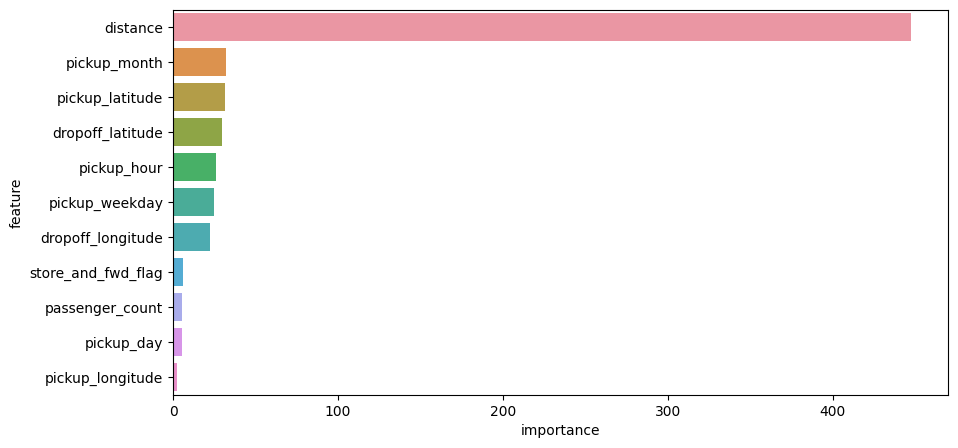

In [105]:

feature_importance = pd.DataFrame(
    {'feature': X.columns, 'importance': np.abs(best_custom_lr.weights)}
).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.show()